In [9]:
# importando as bibliotecas necessárias

import numpy as np                                  # biblioteca para cálculos matemáticos
import pandas as pd                                 # biblioteca para manipulação de dados
import matplotlib.pyplot as plt                     # biblioteca para plotagem de gráficos
from sklearn.preprocessing import MinMaxScaler      # biblioteca para normalização de dados
from tensorflow.keras.models import Sequential      # biblioteca para construção de redes neurais
from tensorflow.keras.layers import Dense           # biblioteca para camadas densas
from tensorflow.keras.layers import LSTM            # biblioteca para camadas LSTM
from tensorflow.keras.layers import Dropout         # biblioteca para camadas Dropout

In [2]:
# importando os dados de treino e teste

train = pd.read_csv('./data/Google_Stock_Price_Train.csv')
test = pd.read_csv('./data/Google_Stock_Price_Test.csv')

In [11]:
# visualizando os dados de treino

train.head()

,Date,Open,High,Low,Close,Volume
0,1/3/2012,325.25,332.83,324.97,663.59,"7,380,500"
1,1/4/2012,331.27,333.87,329.08,666.45,"5,749,400"
2,1/5/2012,329.83,330.75,326.89,657.21,"6,590,300"
3,1/6/2012,328.34,328.77,323.68,648.24,"5,405,900"
4,1/9/2012,322.04,322.29,309.46,620.76,"11,688,800"


In [33]:
# visualizando os dados de teste

test.head()

,Date,Open,High,Low,Close,Volume
0,1/3/2017,778.81,789.63,775.80,786.14,"1,657,300"
1,1/4/2017,788.36,791.34,783.16,786.90,"1,073,000"
2,1/5/2017,786.08,794.48,785.02,794.02,"1,335,200"
3,1/6/2017,795.26,807.90,792.20,806.15,"1,640,200"
4,1/9/2017,806.40,809.97,802.83,806.65,"1,272,400"


In [3]:
# transformando os dados de treino em arrays

train_set = train.iloc[:, 1:2].values

In [5]:
# normalização entre 0 e 1

scale = MinMaxScaler(feature_range=(0, 1))
train_set_scaled = scale.fit_transform(train_set)
train_set_scaled

array([[0.08581368],
       [0.09701243],
       [0.09433366],
       ...,
       [0.95725128],
       [0.93796041],
       [0.93688146]])

In [8]:
# processo de treino 

X_train = []   # intervalo de tempo 60 dias
y_train = []   # previsão do proximo dia

for i in range(60, 1258):
    X_train.append(train_set_scaled[i-60: i, 0])
    y_train.append(train_set_scaled[i, 0])

# conversão de listas para arrays
X_train, y_train = np.array(X_train), np.array(y_train)

# transformando os arrays em matrizes para o Keras
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

In [10]:
# construindo a rede neural LSTM com Keras

# inicializando a rede
regressor = Sequential()

# primeira camada LSTM
regressor.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))

# dropout para evitar overfitting
regressor.add(Dropout(0.2))

# segunda camada LSTM
regressor.add(LSTM(units=50, return_sequences=True))
regressor.add(Dropout(0.2))

# terceira camada LSTM
regressor.add(LSTM(units=50, return_sequences=True))
regressor.add(Dropout(0.2))

# quarta camada LSTM
regressor.add(LSTM(units=50,))
regressor.add(Dropout(0.2))

# camada de saída
regressor.add(Dense(units=1))

In [12]:
# compilando a rede
regressor.compile(optimizer='adam', loss='mean_squared_error')

# treinando a rede
regressor.fit(X_train, y_train, epochs=100, batch_size=32)

Epoch 1/100
38/38 [==============================] - 2s 51ms/step - loss: 0.0416
Epoch 2/100
38/38 [==============================] - 2s 52ms/step - loss: 0.0055
Epoch 3/100
38/38 [==============================] - 2s 55ms/step - loss: 0.0057
Epoch 4/100
38/38 [==============================] - 2s 56ms/step - loss: 0.0050
Epoch 5/100
38/38 [==============================] - 2s 55ms/step - loss: 0.0046
Epoch 6/100
38/38 [==============================] - 2s 55ms/step - loss: 0.0047
Epoch 7/100
38/38 [==============================] - 2s 56ms/step - loss: 0.0047
Epoch 8/100
38/38 [==============================] - 2s 56ms/step - loss: 0.0045
Epoch 9/100
38/38 [==============================] - 2s 57ms/step - loss: 0.0051
Epoch 10/100
38/38 [==============================] - 2s 56ms/step - loss: 0.0041
Epoch 11/100
38/38 [==============================] - 2s 58ms/step - loss: 0.0047
Epoch 12/100
38/38 [==============================] - 2s 58ms/step - loss: 0.0041
Epoch 13/100
38/38 [=====

In [ ]:
# previsões do modelo treinado

In [22]:
# transformando os dados de teste

test_set = test.iloc[:, 1:2].values

In [23]:
# concatenando os dados de treino e teste e um unico dataset

dataset_total = pd.concat((train['Open'], test['Open']), axis=0)

In [24]:
# preparando os dados para a previsão [60 dias antes], e em array

inputs = dataset_total[len(dataset_total) - len(test) - 60:].values

In [25]:
# ajuste do input para o formato esperado pelo Keras

inputs = inputs.reshape(-1, 1)

In [26]:
# normalização dos dados

inputs = scale.transform(inputs)

In [27]:
# preparando os dados para a previsão [60 dias antes]

X_test = []
for i in range(60, 80):
    X_test.append(inputs[i-60: i, 0])

X_test = np.array(X_test)

In [28]:
# transformando os dados para o formato esperado pelo Keras

X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

In [29]:
# previsão do modelo treinado

previ_stock_price = regressor.predict(X_test)

In [30]:
# revertendo a normalização

previ_stock_price = scale.inverse_transform(previ_stock_price)

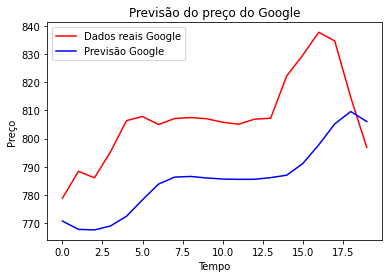

In [32]:
# comparação dos previsões com os dados de teste
# avaliando modelo

plt.plot(test_set, color='red', label='Dados reais Google')
plt.plot(previ_stock_price, color='blue', label='Previsão Google')
plt.title('Previsão do preço do Google')
plt.xlabel('Tempo')
plt.ylabel('Preço')
plt.legend()
plt.show()